# Hello, earthlings!#

Well, here's a news that isn't new to anybody within the borders of Nigeria: Our health sector is literally a torn cloth of a thousand pieces.
Something that is basically a fundamental right has become every government office aspirant's campaign headline. I do not blame them too much anyways, since they have no idea of the state of the health sector; thanks to COVID-19!

Born out of a mix of curiosity and sweet boredom, this analytical piece is the first part of my look into Nigeria's Hospitals (and basic health centres), hereafter referred to as "Health facilities". Other parts will come along later (let us try out some movie-like suspense here biko).

Part of the things I hope to understand at the end of the series is the:
    1. Size of the health facilities in the country
    2. Status of the health facilities from different points of view
    3. Ratio of the available health facilities to the size of the population
    4. Comparison of the status of the Private and Public health facilities in each state.
    ...and more...
    
NB:
    1. Constructive criticisms, corrections, suggetions are all permitted.
    2. I tried several options for some tasks, so I will comment those ones just in case you want to try them out too.
    3. Colour combinations were mixed on coolors.co
       
DISCLAIMER: The contents of this analysis and the ones to come are solely the works of my hand, lol.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
data = pd.read_excel('Hospitals and Clinics.xlsx')
data.head()

,state,lga,ward,uid,facility_code,facility_name,reg_number,start_date,ownership,facility_level,longitude,latitude,operation_status,registration_status,license_status,created,last_updated
0,Abia,Aba North,Ariaria,48319756,01/01/1/1/2/0001,Aba Holy Wounds Hospital,NaN,2003-10-05,Private,Secondary,7.34134,5.11445,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-16 09:46:23
1,Abia,Aba North,Umuola,47587317,01/01/1/1/2/0003,Alpha Inland Hospital,NaN,1985-04-02,Private,Secondary,7.38568,5.12927,Operational,Registered,Licensed,2018-01-01 01:01:01,2020-05-22 13:41:36
2,Abia,Aba North,Old GRA,38145837,01/01/1/1/2/0004,Angels of Mercy Hospital,NaN,2010-12-10,Private,Secondary,7.35492,5.12408,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-26 14:52:35
3,Abia,Aba North,Asaokpuaja,14064567,01/01/1/1/1/0004,Asaokpuaja Health Post,NaN,2012-12-05,Public,Primary,7.3741,5.0768,Operational,Registered,Licensed,2018-01-01 01:01:01,2019-05-09 17:09:09
4,Abia,Aba North,Asa-Okpulor,45782504,01/01/1/1/1/0005,Asaokpulor1 PHC,NaN,2009-05-08,Public,Primary,7.33015,5.07329,Operational,Registered,Licensed,2018-01-01 01:01:01,2020-05-22 13:44:53


In [3]:
data.isnull().any()

state                  False
lga                    False
ward                    True
uid                    False
facility_code          False
facility_name          False
reg_number              True
start_date              True
ownership              False
facility_level         False
longitude               True
latitude               False
operation_status       False
registration_status     True
license_status          True
created                False
last_updated           False
dtype: bool

In [4]:
# Let's just pick the needed columns for this part...

df = data[['state', 'lga', 'ward', 'facility_name', 'last_updated', 'ownership', 'facility_level', 'registration_status', 'operation_status', 'license_status', 'longitude', 'latitude']]
df.head()

,state,lga,ward,facility_name,last_updated,ownership,facility_level,registration_status,operation_status,license_status,longitude,latitude
0,Abia,Aba North,Ariaria,Aba Holy Wounds Hospital,2019-05-16 09:46:23,Private,Secondary,Registered,Operational,Licensed,7.34134,5.11445
1,Abia,Aba North,Umuola,Alpha Inland Hospital,2020-05-22 13:41:36,Private,Secondary,Registered,Operational,Licensed,7.38568,5.12927
2,Abia,Aba North,Old GRA,Angels of Mercy Hospital,2019-05-26 14:52:35,Private,Secondary,Registered,Operational,Licensed,7.35492,5.12408
3,Abia,Aba North,Asaokpuaja,Asaokpuaja Health Post,2019-05-09 17:09:09,Public,Primary,Registered,Operational,Licensed,7.3741,5.0768
4,Abia,Aba North,Asa-Okpulor,Asaokpulor1 PHC,2020-05-22 13:44:53,Public,Primary,Registered,Operational,Licensed,7.33015,5.07329


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31239 entries, 0 to 31238
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   state                31239 non-null  object
 1   lga                  31239 non-null  object
 2   ward                 31233 non-null  object
 3   facility_name        31239 non-null  object
 4   last_updated         31239 non-null  object
 5   ownership            31239 non-null  object
 6   facility_level       31239 non-null  object
 7   registration_status  31102 non-null  object
 8   operation_status     31239 non-null  object
 9   license_status       31103 non-null  object
 10  longitude            31200 non-null  object
 11  latitude             31239 non-null  object
dtypes: object(12)
memory usage: 2.9+ MB


In [6]:
# df['operation_status'] = df['operation_status'].apply(lambda x: x.replace('Closed (Temporary)', 'Closed'))
 
def replace(old_val, new_val):
    df.replace(to_replace=old_val, value=new_val, inplace=True)
    
    return

In [7]:
replace('Closed (Temporary)', 'Closed')
replace(['Pending Operation (Under Construction)', 'Pending Operation (Construction Complete)'], 'Pending Operation')

df['operation_status'].value_counts().index


# I still can't figure out the Warning below, any suggestion would be appreciated!

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Index(['Operational', 'Closed', 'Pending Operation'], dtype='object')

In [8]:
replace('License Cancelled', 'Not Licensed')
replace(np.nan, 'Unknown')

df['license_status'].value_counts().index

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Index(['Licensed', 'Unknown', 'Not Applicable', 'Not Licensed'], dtype='object')

In [9]:
replace(['Provisionally Registered', 'nan'], ['Registered', 'Unknown'])
replace(['Registration Cancelled', 'Registration Suspended', 'Pending Registration'], 'Not Registered')

df['registration_status'].value_counts().index

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Index(['Registered', 'Unknown', 'Not Applicable', 'Not Registered'], dtype='object')

In [10]:
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## A view of the size of the health facilities per state

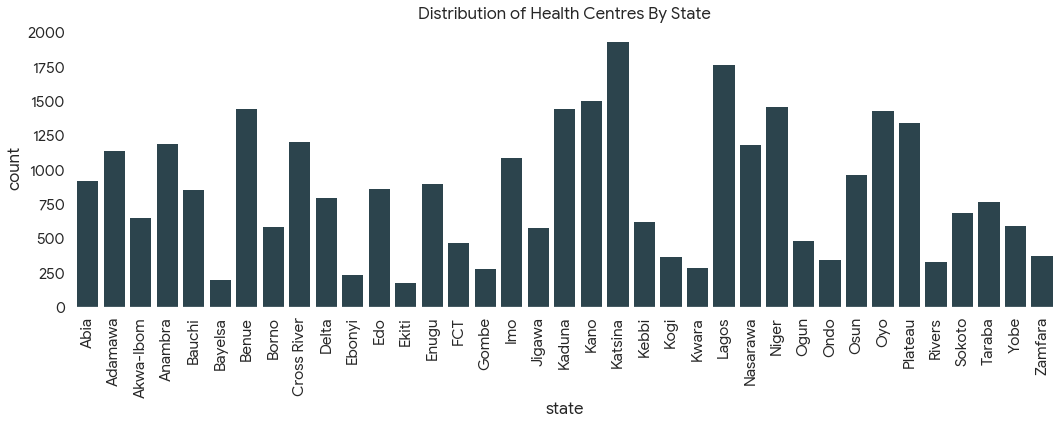

In [11]:
sns.set(style="darkgrid", font="Google Sans", font_scale=1.4)

ax = sns.catplot("state", data=df, aspect=3, kind="count", color='#264653', edgecolor='None')
plt.title('Distribution of Health Centres By State', pad=10)
plt.gca().yaxis.grid(False)
ax.set_xticklabels(rotation=90)
plt.gca().set_facecolor('#ffffff')

## States that have complete information of their health facilities and the number of the facilities

In [12]:
govtApp = df[(df['registration_status'] == 'Registered') & (df['operation_status'] == 'Operational') & (df['license_status'] == 'Licensed')]
govtApp.head()

,state,lga,ward,facility_name,last_updated,ownership,facility_level,registration_status,operation_status,license_status,longitude,latitude
0,Abia,Aba North,Ariaria,Aba Holy Wounds Hospital,2019-05-16 09:46:23,Private,Secondary,Registered,Operational,Licensed,7.341340,5.114450
1,Abia,Aba North,Umuola,Alpha Inland Hospital,2020-05-22 13:41:36,Private,Secondary,Registered,Operational,Licensed,7.385681,5.129272
2,Abia,Aba North,Old GRA,Angels of Mercy Hospital,2019-05-26 14:52:35,Private,Secondary,Registered,Operational,Licensed,7.354919,5.124084
3,Abia,Aba North,Asaokpuaja,Asaokpuaja Health Post,2019-05-09 17:09:09,Public,Primary,Registered,Operational,Licensed,7.374100,5.076800
4,Abia,Aba North,Asa-Okpulor,Asaokpulor1 PHC,2020-05-22 13:44:53,Public,Primary,Registered,Operational,Licensed,7.330150,5.073290


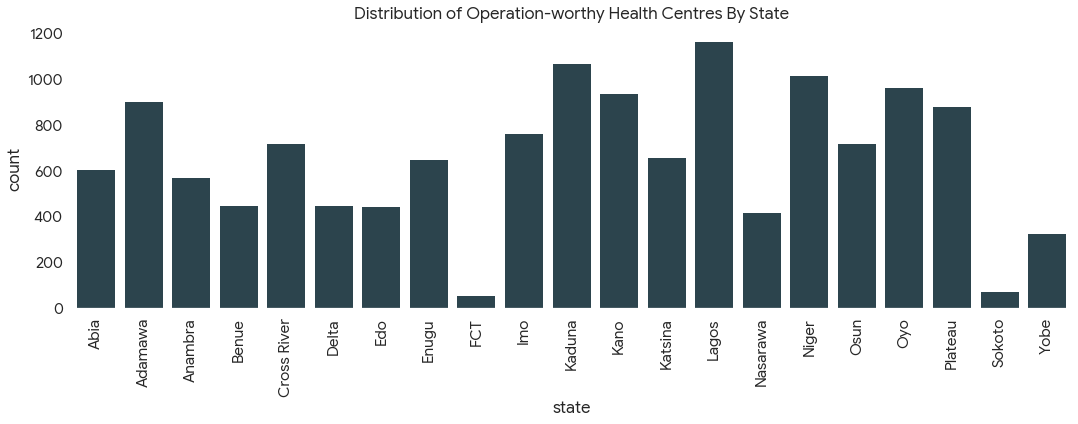

In [13]:
sns.set(style="darkgrid", font="Google Sans", font_scale=1.4)
# plt.style.use("dark_background")

ax = sns.catplot("state", data=govtApp, aspect=3, kind="count", color='#264653', edgecolor='None')
plt.title('Distribution of Operation-worthy Health Centres By State', pad=10)
plt.gca().yaxis.grid(False)
ax.set_xticklabels(rotation=90)
plt.gca().set_facecolor('#ffffff')

## Fancy view of the size of the health facilities per state, lol...geographically though...

In [28]:
states = df.groupby('state').count()['facility_name']
states = pd.DataFrame(states)

# Extract geographical location of all states from another file
wait = pd.read_csv('Covid_Cases_by_State.csv')
# wait.head()

states = states.merge(wait, left_on='state', right_on='STATE').reindex(columns=['STATE', 'facility_name', 'CENTER_Y', 'CENTER_X'])
states['Count'] = states['facility_name']
states = states.drop(['facility_name'], axis=1)
states = states.applymap(str)

print(states.shape)
states

(37, 4)


,STATE,CENTER_Y,CENTER_X,Count
0,Abia,5.453302119,7.523189982000001,915
1,Adamawa,9.323227332,12.40024078,1133
2,Akwa-Ibom,4.907245026,7.846394928,642
3,Anambra,6.222775877,6.932186089,1180
4,Bauchi,10.79664717,9.990588234,846
5,Bayelsa,4.766315328,6.08041884,194
6,Benue,7.341086057999999,8.751907951,1438
7,Borno,11.86524255,13.09877091,580
8,Cross River,5.845901003,8.59875592,1198
9,Delta,5.704898235,5.936929598,793


In [15]:
# GIS Analysis

m = folium.Map(width=400, height=250, location=[9.0820,8.6753], tiles="openstreetmap", zoom_start=5)
# color='#E85D04 

# Add marker one by one on the map
for idx, row in states.iterrows():
    folium.CircleMarker(
      location=[row['CENTER_Y'], row['CENTER_X']],
      radius=int(row['Count'])/150,
      color='#264653', 
      fill=True,
      fill_color='#E85D04'
      ).add_to(m)


folium.TileLayer('stamentoner').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

# Let the comparison begin!...
#### Drum rolls, please...
### The pie charts illustrate the general distributions in the country

In [16]:
# https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

In [17]:
# "pieChart" was born out of pure curiosity, not that it is totally professional,
# but playing around with basic OOP is kinda "cute"

def pieChart(col, explode):
    '''pieChart shows the natiowide distribution the column
      before bar chart splits it down to the distribtution state'''
    
    '''explode: must be the length of value'''
    
    label = df[col].value_counts().index
    value = df[col].value_counts().values
    
    # colors = ['#212529', '#343a40', '#495057', '#6c757d', '#adb5bd', '#ced4da']
    # colors = ['#e85d04', '#f48c06', '#faa307', '#ffba08']
    colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
    
    my_circle = plt.Circle( (0,0), .5, color='white')
    plt.figure(figsize=(6,6))
    plt.pie(value, explode=explode, labels=label, colors=colors, autopct='%1.1f%%', pctdistance=0.7, wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'None'})

    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    
    return

In [18]:
# Repeating the same design tweaks every line sucks, so I bumped it here

def barChart(col, df, title):
    
    # colors = ['#212529', '#343a40', '#495057', '#6c757d', '#adb5bd', '#ced4da']
    # colors = ['#e85d04', '#f48c06', '#faa307', '#ffba08']
    colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
       
    ax = aggregate('state',col,df).plot(kind='bar', stacked=True, color=colors, edgecolor='None', figsize=(20,6), title=title, width=0.8, grid=False)
    
    plt.gca().tick_params(axis='both', which='major', labelsize=17)
    
    # for p in ax.patches:
    #     ax.annotate(s=int(p.get_height()), xy=(p.get_x(), p.get_height()+0.25))
    
    plt.legend(frameon = False)
    plt.gca().set_facecolor('#ffffff')
    
    return

## Operation-worthy Health Centres

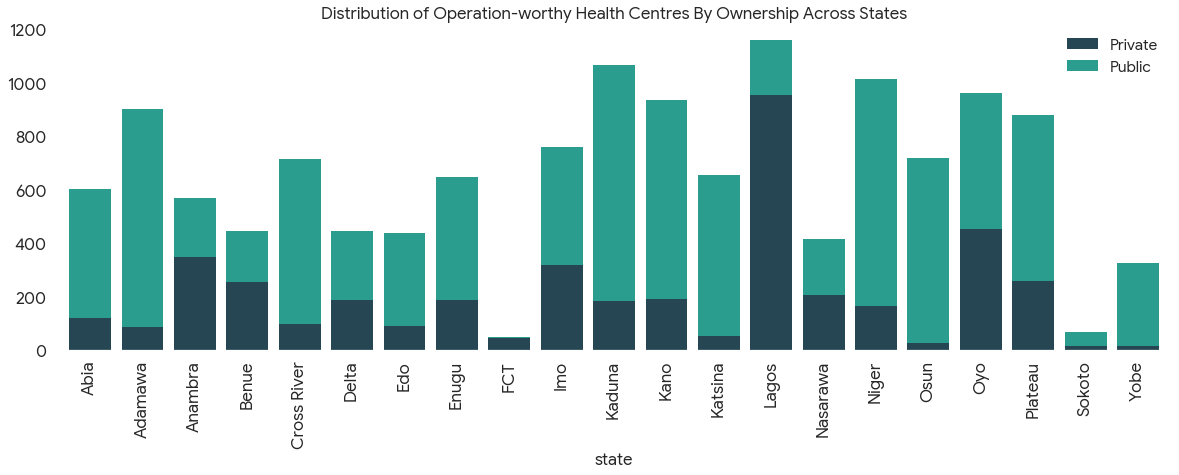

In [19]:
barChart('ownership', govtApp, ('Distribution of Operation-worthy Health Centres By Ownership Across States'))

## Ownership status of the health facilities in the country and per state

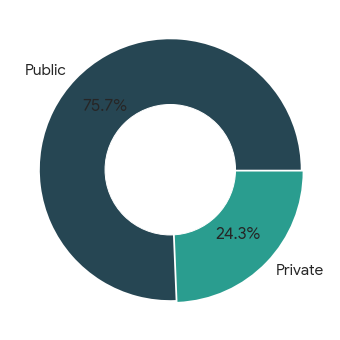

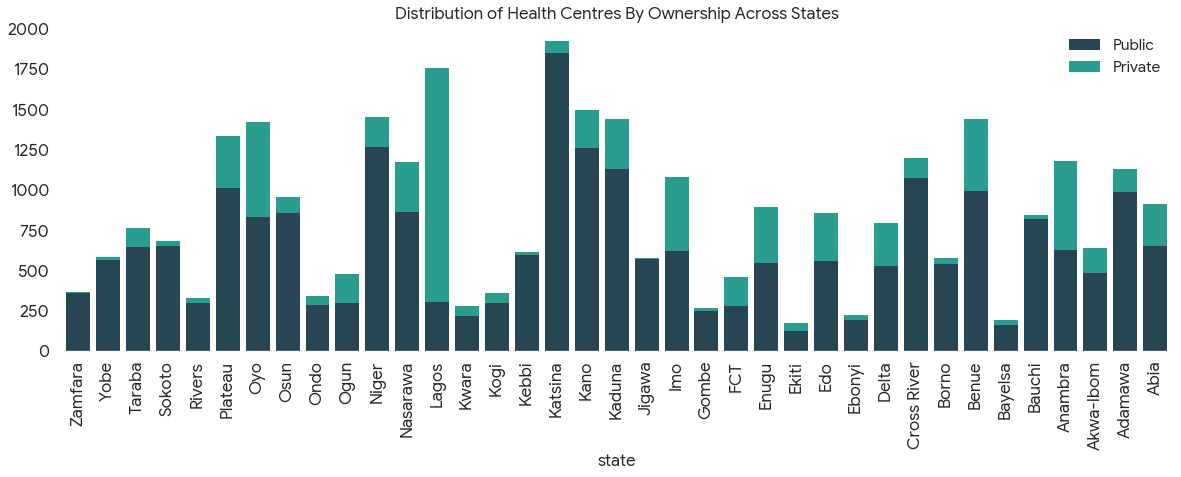

In [20]:
pieChart('ownership', (0, 0.02))

a = df.sort_values(by=['state', 'ownership'], ascending=False)
barChart('ownership', a, ('Distribution of Health Centres By Ownership Across States'))

## Categories of the facilities based on expertise level

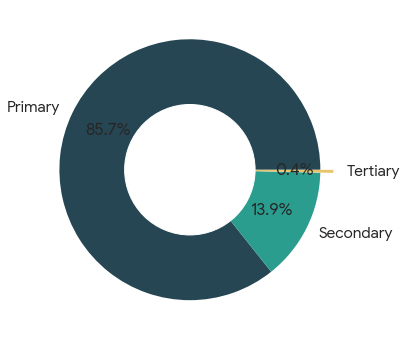

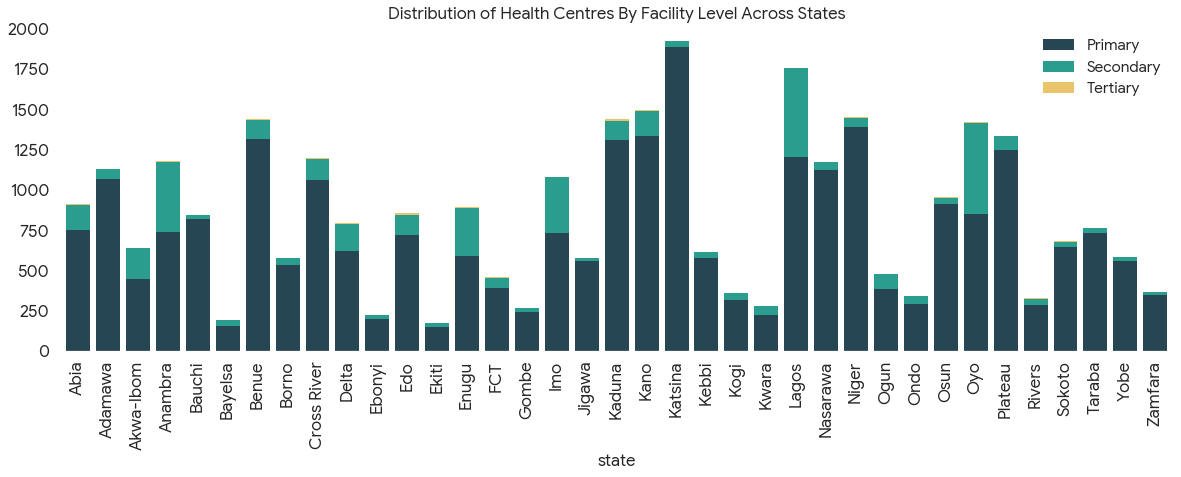

In [21]:
pieChart('facility_level', (0, 0, 0.1))

b = df.sort_values(by=['state', 'facility_level'])
barChart('facility_level', b, ('Distribution of Health Centres By Facility Level Across States'))

## Categories of the facilities based on their operational status

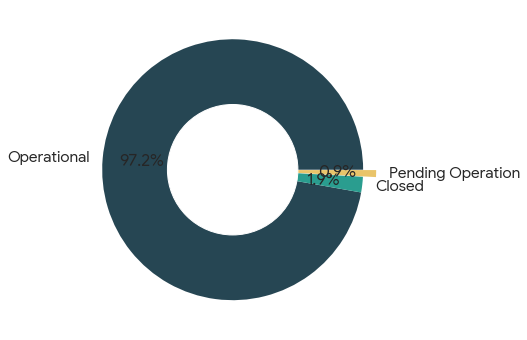

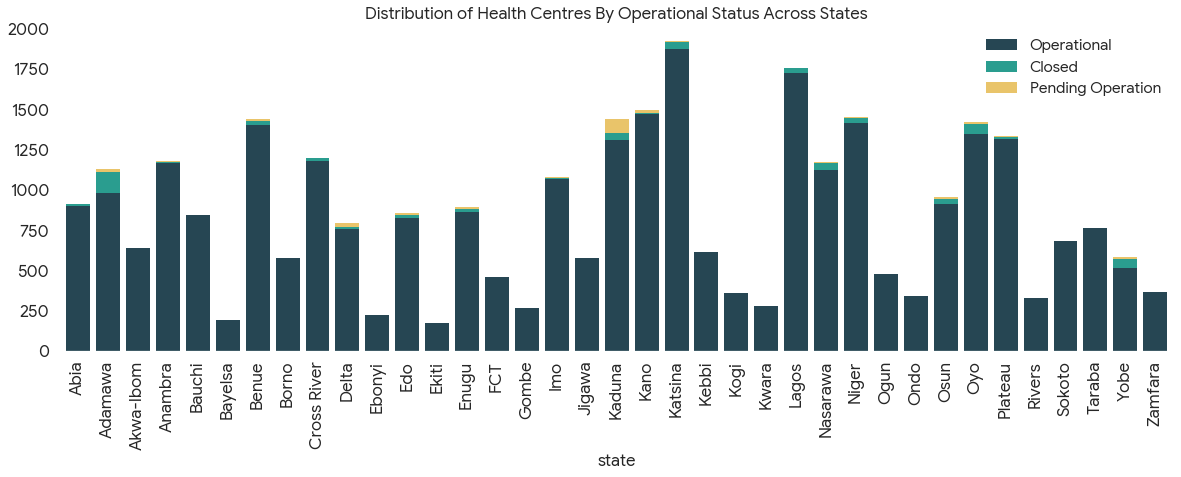

In [22]:
pieChart('operation_status', (0, 0, 0.1))

barChart('operation_status', b, ('Distribution of Health Centres By Operational Status Across States'))

## Categories of the facilities based on their registration status with the government

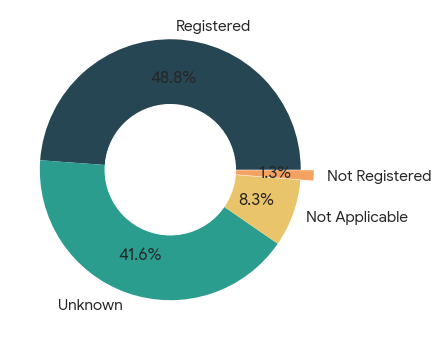

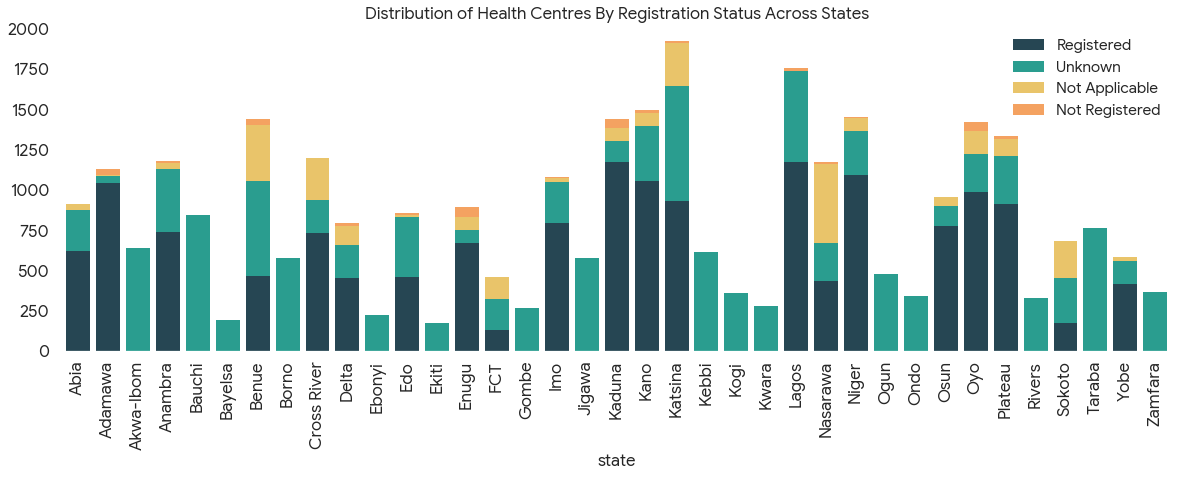

In [23]:
pieChart('registration_status', (0, 0, 0, 0.1))

barChart('registration_status', b, ('Distribution of Health Centres By Registration Status Across States'))

## Categories of the facilities based on the status of their operational license

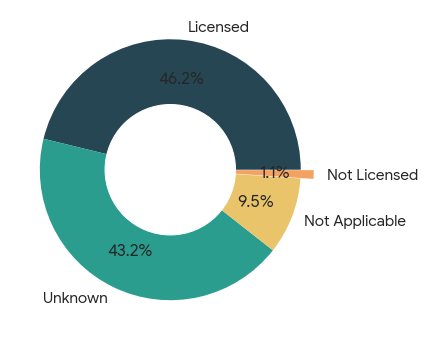

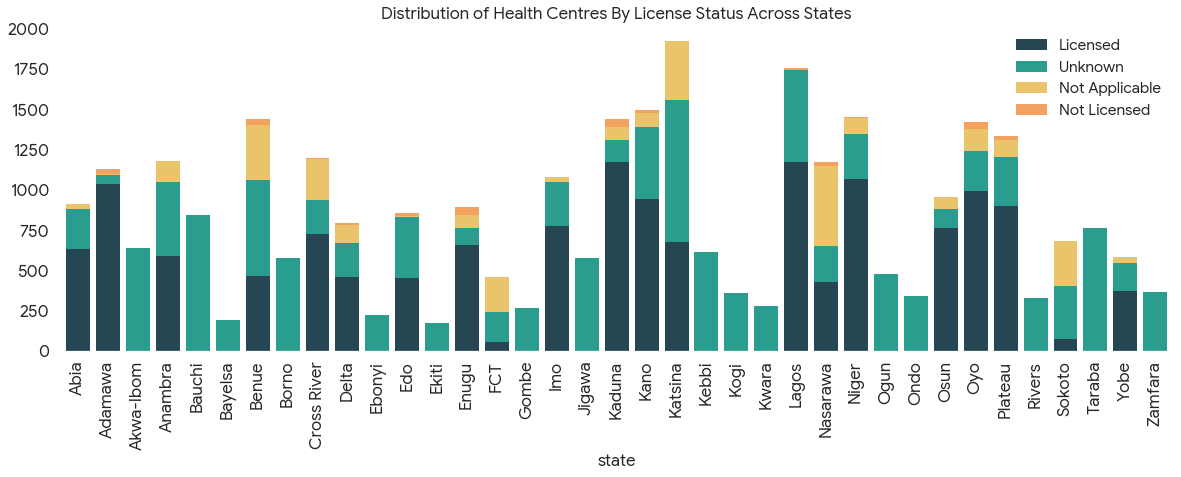

In [24]:
pieChart('license_status', (0, 0, 0, 0.1))

barChart('license_status', b, ('Distribution of Health Centres By License Status Across States'))

# This section is dedicated to comparing the private and public sectors...
#### It is a work in progress... Its remainder will form the bulk of the next part of this analysis. So, the following are for preview purposes only.

In [25]:
own_priv = (df[df['ownership'] == 'Private'])
own_priv = own_priv.sort_values(by=['state', 'facility_level'])


own_pub = (df[df['ownership'] == 'Public'])

# df1, df2

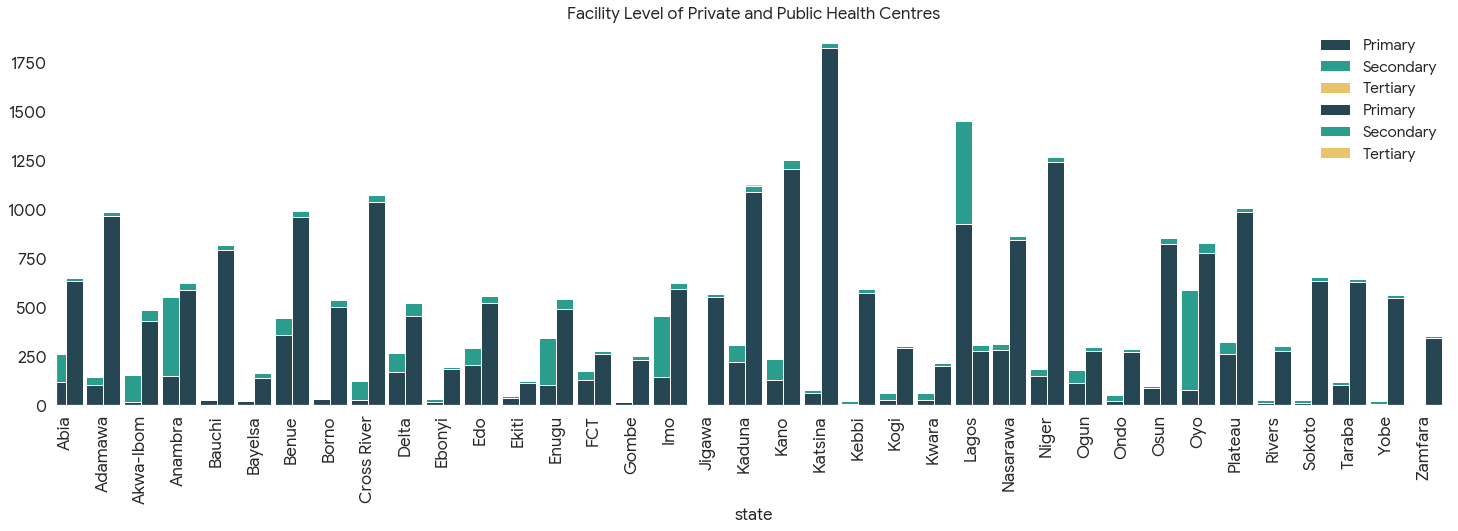

In [26]:
# colors = ['#212529', '#343a40', '#495057', '#6c757d']
# #colors = ['#e85d04', '#f48c06', '#faa307', '#ffba08']
# colors1 = ['#001233', '#33415c', '#5c677d', '#7d8597', '#979dac']
# colors2 = ['#001845', '#002855', '#023e7d', '#0353a4', '#0466c8']
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

ax1 = aggregate('state','facility_level',own_priv).plot(kind='bar', stacked=True, color=colors, edgecolor='white',
                                             figsize=(25, 7),
                                             align='edge',
                                             width=-0.45);
ax2 = aggregate('state','facility_level',own_pub).plot(kind='bar', stacked=True, color=colors, edgecolor='white',
                                             title=('Facility Level of Private and Public Health Centres'),
                                             align='edge',
                                             width=0.45,
                                             ax = ax1,
                                             grid=False);

plt.gca().tick_params(axis='both', which='major', labelsize=17)
plt.legend(frameon = False)
plt.gca().set_facecolor('#ffffff')

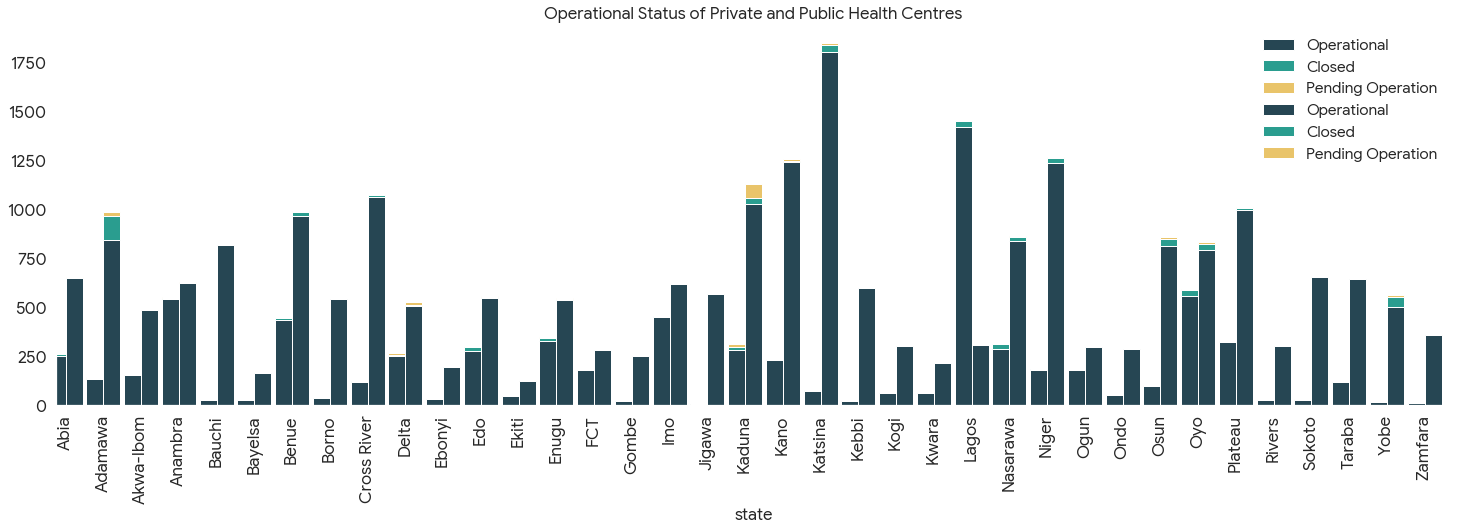

In [27]:
# colors = ['#212529', '#343a40', '#495057', '#6c757d']
# #colors = ['#e85d04', '#f48c06', '#faa307', '#ffba08']
# colors1 = ['#001233', '#33415c', '#5c677d', '#7d8597', '#979dac']
# colors2 = ['#001845', '#002855', '#023e7d', '#0353a4', '#0466c8']
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

ax1 = aggregate('state','operation_status',own_priv).plot(kind='bar', stacked=True, color=colors, edgecolor='white',
                                             figsize=(25, 7),
                                             align='edge',
                                             width=-0.45);
ax2 = aggregate('state','operation_status',own_pub).plot(kind='bar', stacked=True, color=colors, edgecolor='white',
                                             title=('Operational Status of Private and Public Health Centres'),
                                             align='edge',
                                             width=0.45,
                                             ax = ax1,
                                             grid=False);

plt.gca().tick_params(axis='both', which='major', labelsize=17)
plt.legend(frameon = False)
plt.gca().set_facecolor('#ffffff')

# My Opinions tho#

1.) Seaborn has a messed up colour scheme. Plus, even though it has some fancy features like setting the order of bars, its inability to stack bars easily is annoying!

2.) There are lots of missing information for lots of health facilities especially in states like Akwa-Ibom, Bauchi, Bayelsa, Borno, Ebonyi, Ekiti, Gombe, Jigawa, Kebbi, Kogi, Kwara, Ogun, Ondo, Rivers, Taraba and Zamfara.
Only 21 states have "okay" details of their health facilities.
This is a testament to the Federal Ministry of Health's failure to ensure the details of every listed health facilities is known and up-to-date. How else can they rebuild a broken system if they do not understand the system itself?

3.) Some of these health centres are unregistered and unlicensed, yet they are operational. This is a serious issue in this country, for real.

4.) The bulk of the health facilities in the Northern states are public i.e Government-run as opposed to those of the South, which are majorly Private-owned. This might be due to underlying factors including the number of Northerners that study medical courses, government policies on the establishment of health facilities in the North and more.

# Thanks for reading this amateur piece to this point!
##### Constructive criticisms, corrections and suggestions now, please...